In [1]:
import backtester272 as bt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Load data

In [2]:
def load_data(name):
    data = pd.read_csv(f'data/{name}.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data = data.sort_index()
    return data

weights = load_data('weights')  
sectors = load_data('sectors')


In [3]:
# Initialisation du backtester
wip = bt.Backtester(sectors, benchmark_weights=weights)

In [4]:
start_date = sectors.index[0].strftime('%Y-%m-%d')
end_date = sectors.index[-1].strftime('%Y-%m-%d')

# Initialisation des paramètres globaux
global_params = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 6, # Fréquence de rebalancement de la stratégie MaxSharpe (6 mois)
    'window': 30 * 24, # Fenêtre de calcul de la stratégie MaxSharpe (2 ans)
    'freq_tactical': 30, # Fréquence de rebalancement de la stratégie tactique (1 mois)
    'window_tactical': 30 * 3, # Fenêtre de calcul de la stratégie tactique (3 mois)
    'freq_macro': 30 * 3, # Fréquence de rebalancement de la stratégie macro (3 mois)
    'aum': 100,
    'transaction_cost': 0.05 # COût de transaction de 0.05%
}

stategy_constraints = { # Contraintes de la stratégie MaxSharpe
    'max_weight': 0.2,
    'min_weight': 0.05,
    'risk_free_rate': 0.02,
    'total_exposure': 1.0,
    'max_turnover': 1.5,
    'max_tracking_error': 0.07,
    'lmd_ridge':0
}

tactical_constraints = {
    'delta': 30,
    'nb_fractile':3, # Nombre de fractiles pour la stratégie tactique
    'alpha': 0.3
}

macro_constraints = {
    'alpha': 0.01,
    'window_size': 30 * 12, # Fenêtre de calcul de la stratégie macro (12 mois)
    'threshold': 0,
}

MSM = wip.run(**global_params, 
              strategy=bt.MaxSharpeStrategy(**stategy_constraints), 
              macro=bt.MacroTactical(**macro_constraints), 
              tactical=bt.RankMomentumTactical(**tactical_constraints))

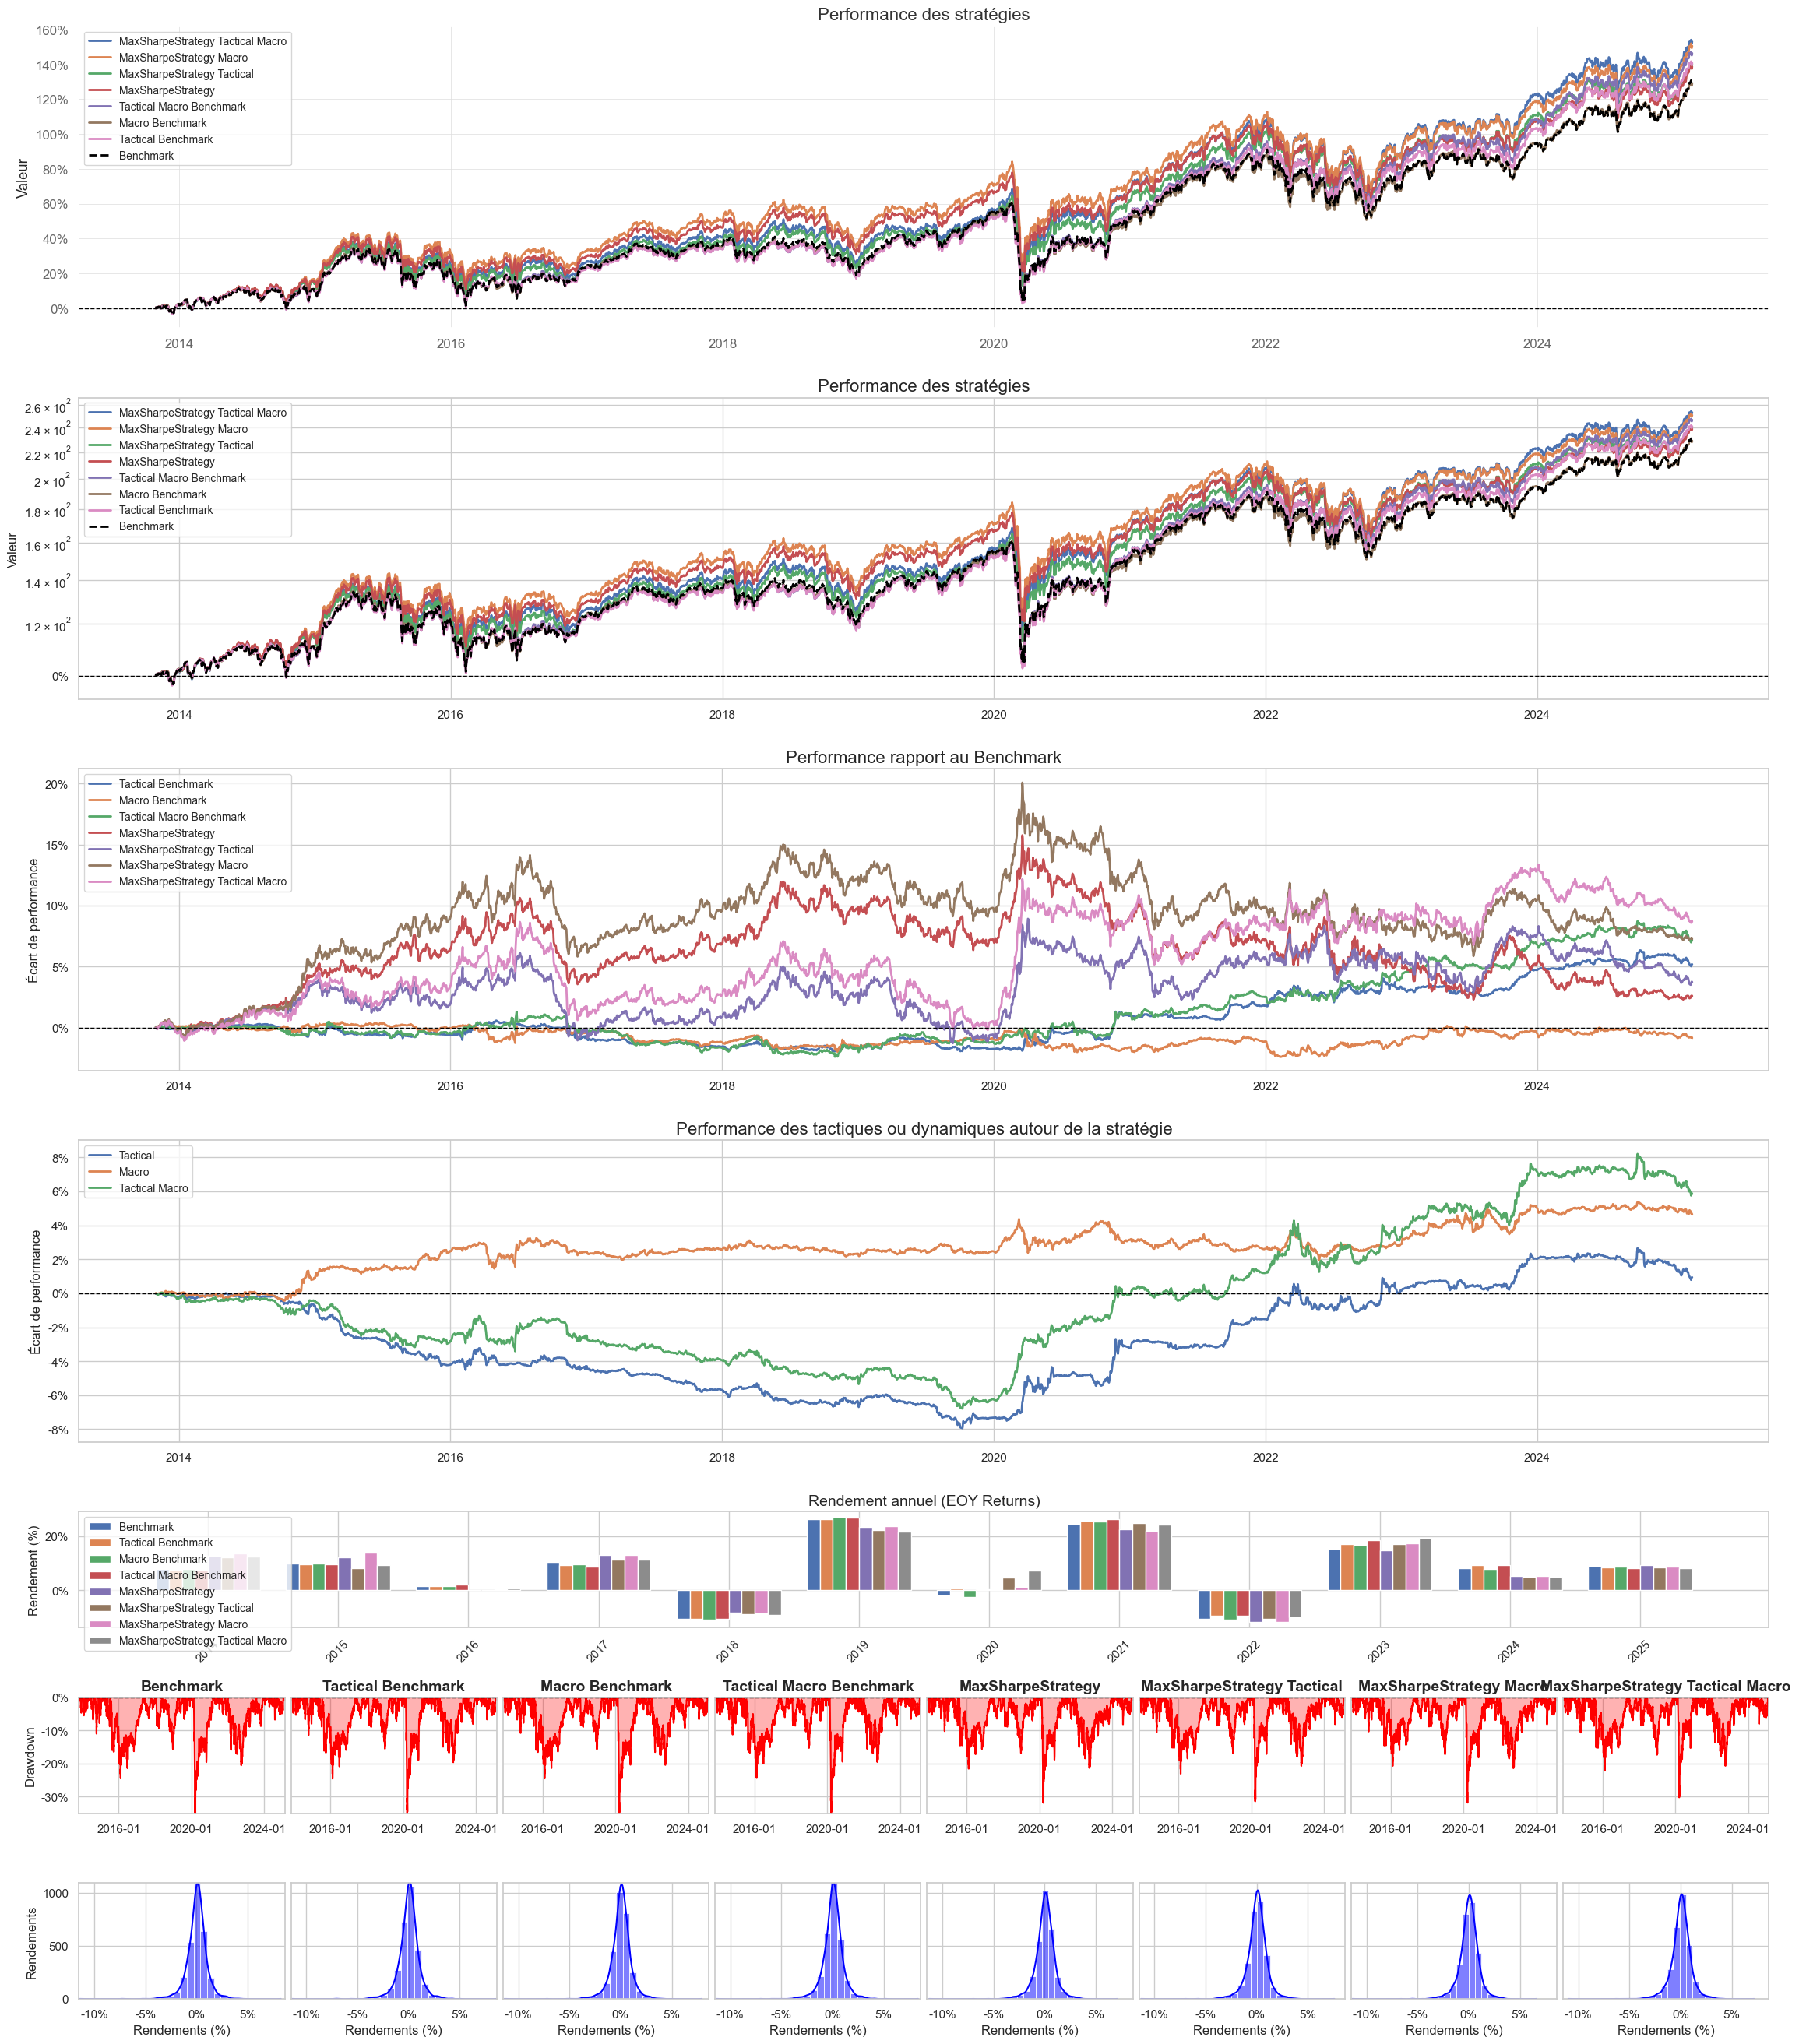

|                     | Benchmark   | Tactical Benchmark   | Macro Benchmark   | Tactical Macro Benchmark   | MaxSharpeStrategy   | MaxSharpeStrategy Tactical   | MaxSharpeStrategy Macro   | MaxSharpeStrategy Tactical Macro   |
|:--------------------|:------------|:---------------------|:------------------|:---------------------------|:--------------------|:-----------------------------|:--------------------------|:-----------------------------------|
| Performance         | 129.70%     | 140.89%              | 128.94%           | 146.43%                    | 138.73%             | 140.32%                      | 138.73%                   | 153.06%                            |
| CAGR                | 7.48%       | 7.93%                | 7.45%             | 8.14%                      | 7.84%               | 7.91%                        | 7.84%                     | 8.39%                              |
| Volatility          | 15.71%      | 15.91%               | 15.46%            | 15.69% 

,Performance,CAGR,Volatility,Downside Volatility,Max Drawdown,Max Drawdown Date,Sharpe Ratio,Sortino Ratio,Calmar Ratio,VaR (95%),CVaR (95%),Tracking Error,Beta,Treynor Ratio,Alpha,Information Ratio
Benchmark,129.70%,7.48%,15.71%,12.86%,-34.97%,2020-03-18,0.48,0.58,0.21,-1.51%,-2.43%,0.00%,0.00,0.00,0.00%,0.00
Tactical Benchmark,140.89%,7.93%,15.91%,12.92%,-35.05%,2020-03-18,0.50,0.61,0.23,-1.51%,-2.44%,1.11%,1.01,0.08,0.36%,0.33
Macro Benchmark,128.94%,7.45%,15.46%,12.64%,-34.88%,2020-03-18,0.48,0.59,0.21,-1.49%,-2.39%,1.10%,0.98,0.08,0.10%,0.10
Tactical Macro Benchmark,146.43%,8.14%,15.69%,12.70%,-34.83%,2020-03-18,0.52,0.64,0.23,-1.52%,-2.40%,1.38%,1.00,0.08,0.69%,0.50
MaxSharpeStrategy,138.73%,7.84%,15.34%,12.48%,-31.92%,2020-03-23,0.51,0.63,0.25,-1.49%,-2.37%,3.34%,0.95,0.08,0.70%,0.21
MaxSharpeStrategy Tactical,140.32%,7.91%,15.55%,12.54%,-31.45%,2020-03-16,0.51,0.63,0.25,-1.54%,-2.39%,3.14%,0.97,0.08,0.65%,0.21
MaxSharpeStrategy Macro,138.73%,7.84%,15.34%,12.48%,-31.92%,2020-03-23,0.51,0.63,0.25,-1.49%,-2.37%,3.51%,0.97,0.08,0.64%,0.18
MaxSharpeStrategy Tactical Macro,153.06%,8.39%,15.34%,12.26%,-30.26%,2020-03-16,0.55,0.68,0.28,-1.54%,-2.35%,3.48%,0.95,0.09,1.26%,0.36


In [5]:
MSM.visualize() # Visualisation de la performance de la stratégie
MSM.gather_metrics(highlight_extremes=True) # Récupération des métriques de performance de la stratégie